In [15]:
# Ozone data를 이용해서 Simple Linear Regression을 구현
# tensorflow를 이용해서 구현해 보아요!

import numpy as np
import pandas as pd
import tensorflow as tf

# 1. trainig data set
df = pd.read_csv('./ozone.csv')
# display(df)
trainig_data = df[['Temp','Ozone']]
# display(trainig_data)   # (153, 2)
# 결측치가 존재해요!(NaN이 존재)
# 결측치를 해결해야 해요! => 가장 쉬운방법 -> 삭제!
#                         => 다른방법 -> 평균, 최대, 최소 
#                         => 조금더 나은방법 => ML을 이용해 예측한 값을 이용
# 삭제할꺼예요!!
trainig_data = trainig_data.dropna(how='any')
display(trainig_data.shape) # (116, 2)  너무 많이 삭제되었어요..좋지 않아요!

# 이상치를 처리해야 해요!
# 이상치가 존재하면 학습의 결과가 크게 왜곡될 수 있어요!
# 일단은 이상치 처리를 하지 않을꺼예요!

x_data = trainig_data['Temp'].values.reshape(-1,1)
# print(x_data)
t_data = trainig_data['Ozone'].values.reshape(-1,1)

# 2. placeholder
X = tf.placeholder(shape=[None,1], dtype=tf.float32)
T = tf.placeholder(shape=[None,1], dtype=tf.float32)

# 3. Weight & bias 
W = tf.Variable(tf.random.normal([1,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

# 4. Hypothesis (predict model)
H = tf.matmul(X,W) + b

# 5. loss function
loss = tf.reduce_mean(tf.square(H - T))

# 6. train
train = tf.train.GradientDescentOptimizer(learning_rate=1e-4).minimize(loss)

# 7. session, 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 8. 학습
for step in range(300000):
    
    _, W_val, b_val, loss_val = sess.run([train, W, b, loss], 
                                         feed_dict={X: x_data, T: t_data})
    if step % 30000 == 0:
        print('W : {}, b : {}, loss : {}'.format(W_val, b_val, loss_val))

(116, 2)

W : [[0.5777743]], b : [-0.4417297], loss : 865.7070922851562
W : [[0.7284522]], b : [-12.648489], loss : 814.3255615234375
W : [[0.87006927]], b : [-23.8385], loss : 772.553466796875
W : [[0.9998807]], b : [-34.095676], loss : 737.4526977539062
W : [[1.1188967]], b : [-43.49985], loss : 707.95166015625
W : [[1.2279793]], b : [-52.11911], loss : 683.1646728515625
W : [[1.3279867]], b : [-60.021294], loss : 662.3325805664062
W : [[1.4195956]], b : [-67.25986], loss : 644.8387451171875
W : [[1.503619]], b : [-73.89905], loss : 630.129150390625
W : [[1.5807611]], b : [-79.9945], loss : 617.7493896484375


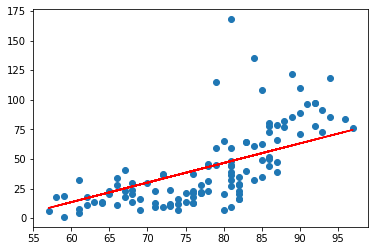

[[49.838455]]


In [19]:
import matplotlib.pyplot as plt

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val.ravel() + b_val, color='r')
plt.show()

# prediction
result = sess.run(H, feed_dict={X: [[82]]})
print(result)   # [[49.838455]]    ?? 맞는거야 틀린거야 ??


W: [[2.4287033]], b: [-146.99549097]
[[52.15818003]]


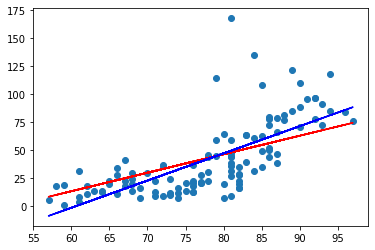

In [23]:
# 믿고쓰는 sklearn을 이용해서 해당 data를 학습시키고 predict해 보아요!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

# 1. trainig data set
df = pd.read_csv('./ozone.csv')
trainig_data = df[['Temp','Ozone']]
trainig_data = trainig_data.dropna(how='any')
x_data = trainig_data['Temp'].values.reshape(-1,1)
t_data = trainig_data['Ozone'].values.reshape(-1,1)

# 2. model 생성
model = linear_model.LinearRegression()

# 3. model을 학습
model.fit(x_data,t_data)

# 4. Weight, bias 출력
# tensorflow 구현 : W : [[1.5807611]], b : [-79.9945]
# sklearn 구현 : W: [[2.4287033]], b: [-146.99549097]
print('W: {}, b: {}'.format(model.coef_, model.intercept_))

# predict
# tensorflow : [[49.838455]]
# sklearn : [[52.15818003]]
print(model.predict([[82]]))

plt.scatter(x_data, t_data)
plt.plot(x_data, x_data*W_val.ravel() + b_val, color='r')
plt.plot(x_data, x_data*model.coef_.ravel() + model.intercept_, color='b')
plt.show()
